In [1]:
from kmc_python.util_cuda import * 
from matplotlib import pyplot as plt
import json
from tqdm.auto import tqdm
import multiprocessing

In [2]:
config = open("./Default_config.json","r")
config = json.load(config)


In [3]:
# nx 32 nt 32 num_flavors 4 coupling 0.54 step_size 0.1 noise_parameter 1.5 kr_trajectory_length 200 kr_refreshing_steps 2 measurement_interval 1 max_cg_iter_for_hamil 2000 residue_cg_hamil 0.000001 max_cg_iter_for_piup 1000 residue_cg_piup 0.0001

In [10]:
config["nx"] = 32
config["nt"] = 32
config["kr_trajectory_length"] = 200
config["step_size"] = 0.1

In [11]:
def runner(f):
    result = main(prompt=2,
                  file=None,
                  dict_=f,
                  suppress_output=True
                 )
    return result

In [12]:

_,_ = main(prompt=2,file=None,dict_=config,suppress_output=True)

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [13]:
config["nx"] = 64
config["nt"] = 64
config["kr_trajectory_length"] = 200
config["step_size"] = 0.05

In [14]:
_,_ = main(prompt=2,file=None,dict_=config,suppress_output=True)

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [16]:
config["nx"] = 128
config["nt"] = 128
config["kr_trajectory_length"] = 200
config["step_size"] = 0.05

_,_ = main(prompt=2,file=None,dict_=config,suppress_output=True)

In [ ]:
_,_ = main(prompt=2,file=None,dict_=config,suppress_output=True)

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
config["nx"] = 1024
config["nt"] = 1024
config["kr_trajectory_length"] = 200
config["step_size"] = 0.001

_,_ = main(prompt=2,file=None,dict_=config,suppress_output=True)

In [ ]:
lambda_

In [84]:
PROCESSES = 128
configs = []
for i in [0.5,0.54,0.6,0.64,0.7]:
    config.update({"coupling":i})
    configs.append(config.copy())


In [85]:
with multiprocessing.Pool(PROCESSES) as pool:
    # results = [pool.apply_async(main, [2,None,config_,True]) for config_ in configs]
    results = pool.map(runner,configs)

In [86]:
g_ = []
av_sigma_ = []
lambda_ = []
accp_ = []
for i,stat in enumerate(results):
    av_sigma = sum(stat[0][-500:])/len(stat[0][-500:])
    accp = stat[1]
    g = configs[i]["coupling"]
    av_sigma_.append(av_sigma)
    accp_.append(accp)
    g_.append(g)
    lambda_.append(1/g**2)

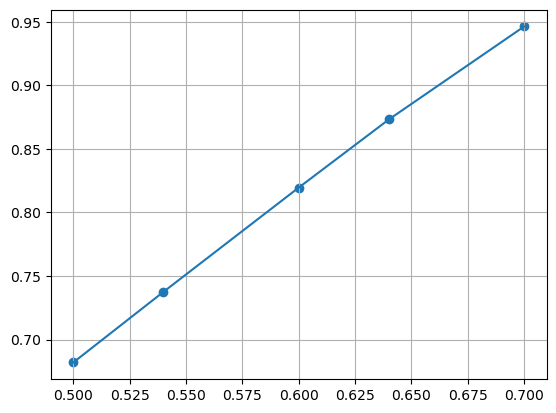

In [89]:
plt.plot(g_,av_sigma_)
plt.grid()
plt.scatter(g_,av_sigma_)

In [90]:
g_

[0.5, 0.54, 0.6, 0.64, 0.7]

In [91]:
av_sigma_

[0.6819772211252517,
 0.7375152136138695,
 0.8195086072324435,
 0.8731374559081053,
 0.9462335215022878]

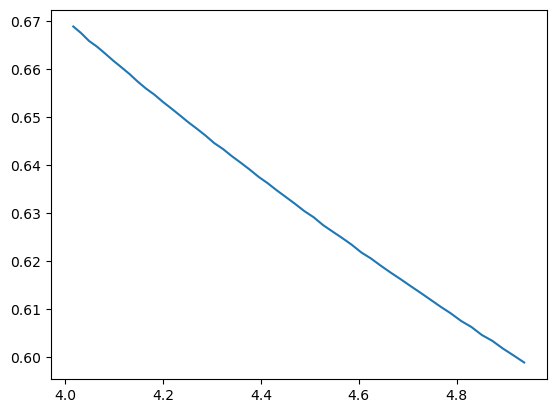

In [69]:

plt.plot(lambda_,av_sigma_)
# plt.yscale("symlog")
# plt.ylim(0.1,1)
# plt.xlim(3,5)

In [ ]:
plt.scatter(g_,accp_)

In [ ]:
plt.plot(arr)
plt.xlabel("Steps")
plt.ylabel("<$\sigma$>")
plt.grid(True)

In [ ]:
avs

In [19]:
s

([0.9962433717763787,
  0.9819253122288357,
  0.987909285664426,
  0.987909285664426,
  0.9905317989818088,
  0.9964188497756985,
  0.9941356766470958,
  1.0167040138843293,
  1.0244652928856737,
  1.0244652928856737,
  1.052915630895935,
  1.079855226653581,
  1.08638098349961,
  1.1067188596107305,
  1.1335525139705895,
  1.1573271948364359,
  1.169157259891203,
  1.180002577801254,
  1.180002577801254,
  1.180002577801254,
  1.180002577801254,
  1.180002577801254,
  1.1835957942136908,
  1.200945131073015,
  1.2276015497213142,
  1.238812557151669,
  1.2516414053648646,
  1.2618639512215775,
  1.2643027836280618,
  1.2615141497052553,
  1.260140716233305,
  1.2690900250204218,
  1.2688931729318766,
  1.2669956191397613,
  1.2634852714828284,
  1.271309049291777,
  1.274326489731906,
  1.2764824603081202,
  1.2764824603081202,
  1.2847044925991882,
  1.2804451752631065,
  1.276190890939184,
  1.2624659929078856,
  1.252856333111633,
  1.2672699770422162,
  1.2592199026945998,
  1.267